In [8]:
%matplotlib notebook

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from functools import reduce

In [61]:
#Take in data and read csv files

#May 2019
zone1_may2019 = "Resources/raw_zones_data/zone1_may2019.csv"
zone2_may2019 = "Resources/raw_zones_data/zone2_may2019.csv"
zone3_may2019 = "Resources/raw_zones_data/zone3_may2019.csv"
zone4_may2019 = "Resources/raw_zones_data/zone4_may2019.csv"
zone5_may2019 = "Resources/raw_zones_data/zone5_may2019.csv"
zone6_may2019 = "Resources/raw_zones_data/zone6_may2019.csv"


#Read May 2019 Data File and store into Pandas DataFrames
zone1_may2019 = pd.read_csv(zone1_may2019)
zone2_may2019 = pd.read_csv(zone2_may2019)
zone3_may2019 = pd.read_csv(zone3_may2019)
zone4_may2019 = pd.read_csv(zone4_may2019)
zone5_may2019 = pd.read_csv(zone5_may2019)
zone6_may2019 = pd.read_csv(zone6_may2019)

#zone1_may2019


In [65]:
#groupby 2019 crime type
#zone1
zone1_2019 = zone1_may2019[['UC2_Literal']]
zone1_crime_type_2019 = zone1_may2019.groupby(['UC2_Literal'])
zone1_total_crimes = zone1_crime_type_2019['Report Number'].count()

#zone2
zone2_2019 = zone2_may2019[['UC2_Literal']]
zone2_crime_type_2019 = zone2_may2019.groupby(['UC2_Literal'])
zone2_total_crimes = zone2_crime_type_2019['Report Number'].count()

#zone3
zone3_2019 = zone3_may2019[['UC2_Literal']]
zone3_crime_type_2019 = zone3_may2019.groupby(['UC2_Literal'])
zone3_total_crimes = zone3_crime_type_2019['Report Number'].count()

#zone4
zone4_2019 = zone4_may2019[['UC2_Literal']]
zone4_crime_type_2019 = zone4_may2019.groupby(['UC2_Literal'])
zone4_total_crimes = zone4_crime_type_2019['Report Number'].count()

#zone5
zone5_2019 = zone5_may2019[['UC2_Literal']]
zone5_crime_type_2019 = zone5_may2019.groupby(['UC2_Literal'])
zone5_total_crimes = zone5_crime_type_2019['Report Number'].count()

#zone6
zone6_2019 = zone6_may2019[['UC2_Literal']]
zone6_crime_type_2019 = zone6_may2019.groupby(['UC2_Literal'])
zone6_total_crimes = zone6_crime_type_2019['Report Number'].count()

#test print to confirm
zone6_total_crimes

UC2_Literal
AGG ASSAULT              18
AUTO THEFT               49
BURGLARY                 37
HOMICIDE                  1
LARCENY-FROM VEHICLE    199
LARCENY-NON VEHICLE     129
ROBBERY                  12
Name: Report Number, dtype: int64

In [67]:
#Creating a new DF with all zones for 2019
all_zones_2019 = pd.DataFrame ({"Zone1_19": zone1_total_crimes,
                               "Zone2_19": zone2_total_crimes,
                               "Zone3_19": zone3_total_crimes,
                               "Zone3_19": zone3_total_crimes,
                               "Zone4_19": zone4_total_crimes,
                               "Zone5_19": zone5_total_crimes,
                               "Zone6_19": zone6_total_crimes})

all_zones_2019.index.name = "Crime Type"

#remove NaN
all_zones_2019['Zone5_19']=all_zones_2019['Zone5_19'].fillna(0)

all_zones_2019

,Zone1_19,Zone2_19,Zone3_19,Zone4_19,Zone5_19,Zone6_19
Crime Type,,,,,,
AGG ASSAULT,53,16,54,46,34.0,18
AUTO THEFT,39,53,47,57,41.0,49
BURGLARY,54,41,68,63,21.0,37
HOMICIDE,2,2,1,2,0.0,1
LARCENY-FROM VEHICLE,113,159,79,94,214.0,199
LARCENY-NON VEHICLE,74,132,63,53,102.0,129
ROBBERY,38,9,8,21,20.0,12


<IPython.core.display.Javascript object>


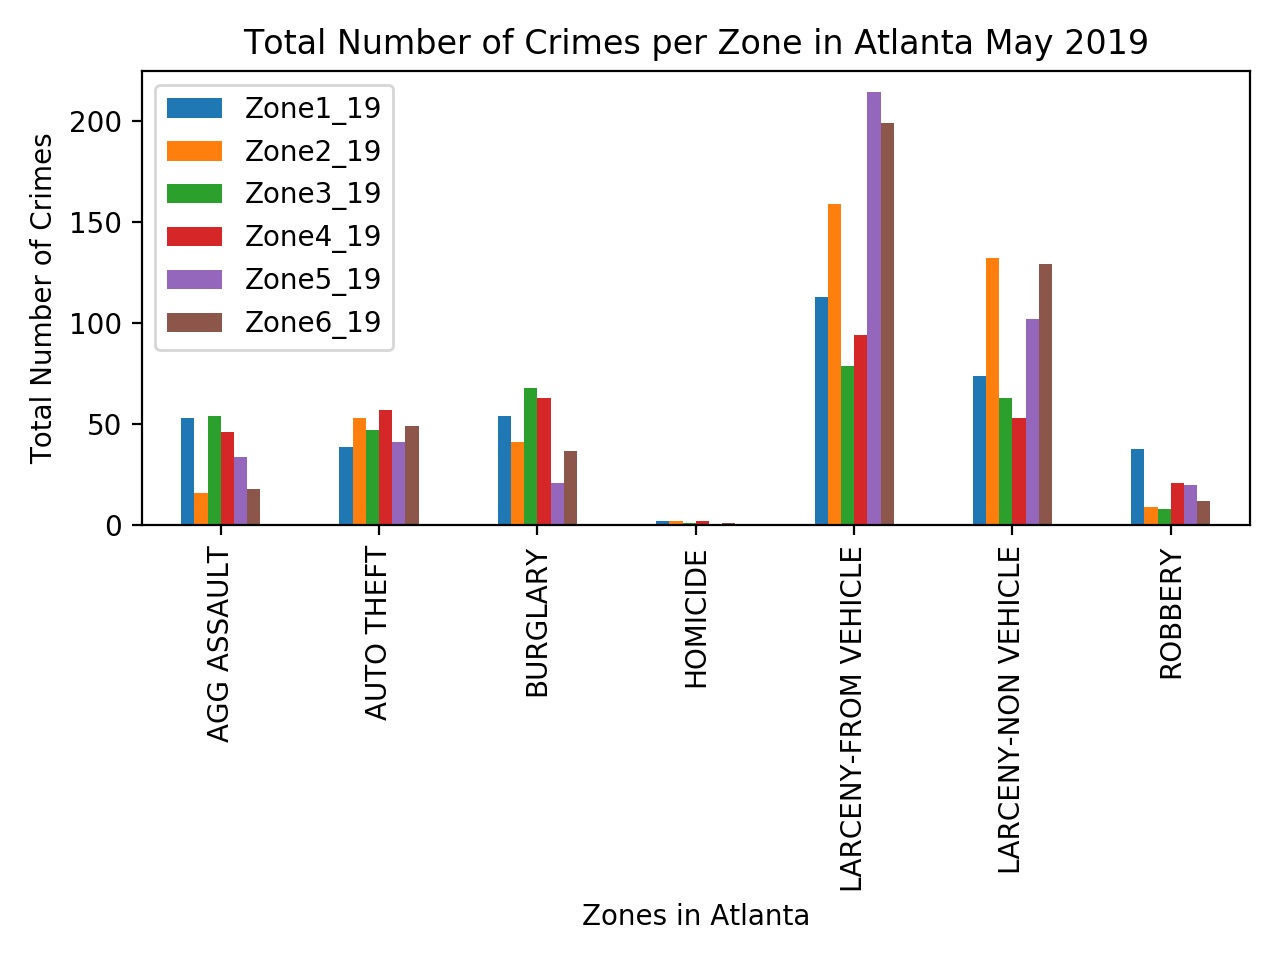

In [102]:
##Test Bar chart with zones May 2019
#create bar chart with pandas
zones_may2019_chart = all_zones_2019.plot(kind='bar')

#labels
zones_may2019_chart.set_xlabel("Zones in Atlanta")
zones_may2019_chart.set_ylabel("Total Number of Crimes")
zones_may2019_chart.set_title("Total Number of Crimes per Zone in Atlanta May 2019")

plt.show()
plt.tight_layout()


In [60]:
#Take in data and read csv files

#May 2020
zone1_may2020 = "Resources/raw_zones_data/zone1_may2020.csv"
zone2_may2020 = "Resources/raw_zones_data/zone2_may2020.csv"
zone3_may2020 = "Resources/raw_zones_data/zone3_may2020.csv"
zone4_may2020 = "Resources/raw_zones_data/zone4_may2020.csv"
zone5_may2020 = "Resources/raw_zones_data/zone5_may2020.csv"
zone6_may2020 = "Resources/raw_zones_data/zone6_may2020.csv"


#Read May 2019 Data File and store into Pandas DataFrames
zone1_may2020 = pd.read_csv(zone1_may2020)
zone2_may2020 = pd.read_csv(zone2_may2020)
zone3_may2020 = pd.read_csv(zone3_may2020)
zone4_may2020 = pd.read_csv(zone4_may2020)
zone5_may2020 = pd.read_csv(zone5_may2020)
zone6_may2020 = pd.read_csv(zone6_may2020)

#zone1_may2020

In [90]:
#groupby 2020 crime type
#zone1
zone1_2020 = zone1_may2020[['UC2_Literal']]
zone1_crime_type_2020 = zone1_may2020.groupby(['UC2_Literal'])
zone1_total_crimes = zone1_crime_type_2020['Report Number'].count()

#zone2
zone2_2020 = zone2_may2020[['UC2_Literal']]
zone2_crime_type_2020 = zone2_may2020.groupby(['UC2_Literal'])
zone2_total_crimes = zone2_crime_type_2020['Report Number'].count()

#zone3
zone3_2020 = zone3_may2020[['UC2_Literal']]
zone3_crime_type_2020 = zone3_may2020.groupby(['UC2_Literal'])
zone3_total_crimes = zone3_crime_type_2020['Report Number'].count()

#zone4
zone4_2020 = zone4_may2020[['UC2_Literal']]
zone4_crime_type_2020 = zone4_may2020.groupby(['UC2_Literal'])
zone4_total_crimes = zone4_crime_type_2020['Report Number'].count()

#zone5
zone5_2020 = zone5_may2020[['UC2_Literal']]
zone5_crime_type_2020 = zone5_may2020.groupby(['UC2_Literal'])
zone5_total_crimes = zone5_crime_type_2020['Report Number'].count()

#zone6
zone6_2020 = zone6_may2020[['UC2_Literal']]
zone6_crime_type_2020 = zone6_may2020.groupby(['UC2_Literal'])
zone6_total_crimes = zone6_crime_type_2020['Report Number'].count()

#test print to confirm
zone6_total_crimes

UC2_Literal
AGG ASSAULT             111
AUTO THEFT              298
BURGLARY                125
LARCENY-FROM VEHICLE    385
LARCENY-NON VEHICLE     602
ROBBERY                  49
Name: Report Number, dtype: int64

In [91]:
#Creating a new DF with all zones for 2020
all_zones_2020 = pd.DataFrame ({"Zone1_20": zone1_total_crimes,
                               "Zone2_20": zone2_total_crimes,
                               "Zone3_20": zone3_total_crimes,
                               "Zone3_20": zone3_total_crimes,
                               "Zone4_20": zone4_total_crimes,
                               "Zone5_20": zone5_total_crimes,
                               "Zone6_20": zone6_total_crimes})

all_zones_2020.index.name = "Crime Type"

#remove NaN
all_zones_2020['Zone6_20']=all_zones_2020['Zone6_20'].fillna(0)

all_zones_2020.reset_index()

all_zones_2020

,Zone1_20,Zone2_20,Zone3_20,Zone4_20,Zone5_20,Zone6_20
Crime Type,,,,,,
AGG ASSAULT,390,118,340,350,230,111.0
AUTO THEFT,147,174,183,187,206,298.0
BURGLARY,174,581,307,267,278,125.0
HOMICIDE,7,7,7,27,7,0.0
LARCENY-FROM VEHICLE,210,387,321,328,497,385.0
LARCENY-NON VEHICLE,305,230,278,360,470,602.0
ROBBERY,62,55,71,83,91,49.0


In [72]:
#combine May 2019 and May 2020 datasets for all zones
allzones_May2019_20 = pd.merge(all_zones_2019, all_zones_2020, how="outer", on=["Crime Type"])

allzones_May2019_20


,Zone1_19,Zone2_19,Zone3_19,Zone4_19,Zone5_19,Zone6_19,Zone1_20,Zone2_20,Zone3_20,Zone4_20,Zone5_20,Zone6_20
Crime Type,,,,,,,,,,,,
AGG ASSAULT,53,16,54,46,34.0,18,390,118,340,350,230,111.0
AUTO THEFT,39,53,47,57,41.0,49,147,174,183,187,206,298.0
BURGLARY,54,41,68,63,21.0,37,174,581,307,267,278,125.0
HOMICIDE,2,2,1,2,0.0,1,7,7,7,27,7,0.0
LARCENY-FROM VEHICLE,113,159,79,94,214.0,199,210,387,321,328,497,385.0
LARCENY-NON VEHICLE,74,132,63,53,102.0,129,305,230,278,360,470,602.0
ROBBERY,38,9,8,21,20.0,12,62,55,71,83,91,49.0


In [100]:
#Grouped Barchart

#error with using index column??

#Bar charts showing May 2019 vs May 2020 crimes by zone
#Setting the positions and width for the bars
pos = list(range(len(allzones_May2019_20['Zone1_19']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with zone1 data, in position pos
plt.bar(pos, allzones_May2019_20['Zone1_19'], width, 
        alpha=0.5, color='#EE3224', label=allzones_May2019_20['Crime Type'][0]) 

#Create a bar with zone2 data, in position pos + some width buffer
plt.bar([p + width for p in pos], allzones_May2019_20['Zone1_20'], width, 
        alpha=0.5, color='#F78F1E', label=allzones_May2019_20['Crime Type'][1])

# Set the y axis label
ax.set_ylabel('Crime Count')

# Set the chart's title
ax.set_title('Total Number of Crimes in Atlanta per Zone: May 2019 vs May 2020')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(allzones_May2019_20['Crime Type'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(allzones_May2019_20['zone1_20'] + allzones_May2019_20['zone2_20'])])

# Adding the legend and showing the plot
plt.legend(['Zone 1', 'Zone 2'], loc='upper left')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>

KeyError: 'Crime Type'